In [113]:
import numpy as np
import pandas as pd
import keras
from keras import regularizers, optimizers
from keras.layers import Input, Conv1D, Dense, Flatten, Activation, UpSampling1D, Dropout, MaxPooling1D
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Model, load_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing.data import StandardScaler

In [114]:
dataset_loc = 'datasets/ionosphere/ionosphere.data'

# cols = ['Elevation', 'Aspect', 'Slope', 'Hor2Hydro', 'Ver2Hydro', 'Hor2Road', 'Hillshade_9am', 'Hillshade_Noon',
#         'Hillshade_3pm', 'Hor2FirePt']

# for f in range(0, 4):
#     cols.append('Wilderness_Area_{}'.format(f))
    
# for f in range(0, 40):
#     cols.append('Soil_Type_%d'%f)

# cols.append("Cover_Type")
cols = []
for f in range(34):
    cols.append("att_%d"%f)

cols.append("class")
    
df = pd.read_csv(dataset_loc, sep=',', names=cols)
df.head()

,att_0,att_1,att_2,att_3,att_4,att_5,att_6,att_7,att_8,att_9,att_10,att_11,att_12,att_13,att_14,att_15,att_16,att_17,att_18,att_19,att_20,att_21,att_22,att_23,att_24,att_25,att_26,att_27,att_28,att_29,att_30,att_31,att_32,att_33,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [115]:
df.tail()

,att_0,att_1,att_2,att_3,att_4,att_5,att_6,att_7,att_8,att_9,att_10,att_11,att_12,att_13,att_14,att_15,att_16,att_17,att_18,att_19,att_20,att_21,att_22,att_23,att_24,att_25,att_26,att_27,att_28,att_29,att_30,att_31,att_32,att_33,class
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g
350,1,0,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,0.78735,0.06678,0.80668,-0.00351,0.79262,-0.01054,0.85764,-0.04569,0.87170,-0.03515,0.81722,-0.09490,0.71002,0.04394,0.86467,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151,g


In [116]:
pd.set_option('display.max_columns', 55)

In [117]:
#10 non categorical and considered class 4 as anomaly and class 2 as normal.

#class 2 only has 2747 points while class 4 has 283301 points.

normal = df[df['class'] == 'g']
anomalies = df[df['class'] == 'b']

normal.loc[normal['class'] == 'g', 'class'] = 0
anomalies.loc[anomalies['class'] == 'b', 'class'] = 1

anomalies.shape, normal.shape

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


((126, 35), (225, 35))

In [118]:

for f in range(0, 20):
    normal = normal.iloc[np.random.permutation(len(normal))]
    
data_set = normal[:10000]
# data_set = pd.concat([normal[:100000], anomalies])

x_train, x_test = train_test_split(data_set, test_size = 0.4, random_state = 42)

# x_train = x_train.sort_values(by=['Time'])
# x_test = x_test.sort_values(by=['Time'])

y_train = x_train["class"]
y_test = x_test["class"]

x_train = x_train.drop("class", axis=1)
x_test = x_test.drop("class", axis=1)

x_train.head(10)

,att_0,att_1,att_2,att_3,att_4,att_5,att_6,att_7,att_8,att_9,att_10,att_11,att_12,att_13,att_14,att_15,att_16,att_17,att_18,att_19,att_20,att_21,att_22,att_23,att_24,att_25,att_26,att_27,att_28,att_29,att_30,att_31,att_32,att_33
48,1,0,0.98166,0.00874,0.98103,-0.03818,0.97565,-0.05699,0.95947,-0.06971,0.99004,-0.04507,0.94713,-0.11102,0.93369,-0.12790,0.94217,-0.11583,0.79682,-0.19200,0.88274,-0.17387,0.86257,-0.18739,0.88487,-0.19689,0.81813,-0.21136,0.78546,-0.23864,0.76911,-0.23095,0.74323,-0.23902
68,1,0,1.00000,0.67784,0.81309,0.82021,0.43019,1.00000,0.20619,0.80541,-0.43872,1.00000,-0.79135,0.77092,-1.00000,0.40268,-0.39046,-0.58634,-0.97907,-0.42822,-0.73083,-0.76339,-0.37671,-0.97491,0.41366,-1.00000,0.41778,-0.93296,0.25773,-1.00000,0.93570,-0.35222,0.98816,0.03446
107,1,0,0.99449,0.00526,0.84082,-0.11313,0.88237,-0.16431,0.99061,-0.06257,0.96484,-0.07496,0.85221,0.02966,0.87161,-0.20848,0.93881,-0.12977,0.98298,-0.08935,0.89876,0.00075,0.87836,-0.05882,0.93368,-0.19872,0.87579,-0.17806,0.94294,-0.16581,0.80253,-0.25741,0.76586,-0.27794
173,1,0,1.00000,0.45455,1.00000,-0.45455,1.00000,0.09091,1.00000,-0.09091,1.00000,0.00000,1.00000,-0.27273,1.00000,-0.18182,1.00000,0.09091,1.00000,0.00000,1.00000,-0.36364,1.00000,0.09091,1.00000,-0.09091,1.00000,-0.04914,1.00000,0.45455,1.00000,-0.27273,1.00000,-0.18182
253,1,0,0.88179,0.43491,0.59573,0.77655,0.19672,0.94537,-0.24103,0.92544,-0.62526,0.71257,-0.86443,0.33652,-0.92384,-0.05338,-0.77356,-0.44707,-0.46950,-0.73285,-0.10237,-0.82217,0.26384,-0.77570,0.55984,-0.55910,0.72147,-0.24433,0.72478,0.09599,0.58137,0.38915,0.34749,0.57656
52,1,0,1.00000,1.00000,1.00000,1.00000,0.91010,1.00000,-0.26970,1.00000,-0.83152,1.00000,-1.00000,1.00000,-1.00000,0.72526,-1.00000,-0.57779,-1.00000,-0.42052,-1.00000,-1.00000,-0.52838,-1.00000,0.90014,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,-0.34686,1.00000,0.34845
313,1,0,0.95559,-0.00155,0.86421,-0.13244,0.94982,-0.00461,0.82809,-0.51171,0.92441,0.10368,1.00000,-0.14247,0.99264,-0.02542,0.95853,-0.15518,0.84013,0.61739,1.00000,-0.16321,0.87492,-0.08495,0.85741,-0.01664,0.84132,-0.01769,0.82427,-0.01867,0.80634,-0.01957,0.78761,-0.02039
56,1,0,1.00000,-0.02259,1.00000,-0.04494,1.00000,-0.06682,1.00000,-0.08799,1.00000,0.56173,1.00000,-0.12738,1.00000,-0.14522,1.00000,0.32407,1.00000,-0.17639,0.99484,-0.18949,0.95601,-0.20081,1.00000,-0.92284,0.87280,-0.21793,0.82920,-0.22370,0.78479,-0.22765,0.73992,-0.22981
211,1,0,0.45455,0.09091,0.63636,0.09091,0.27273,0.18182,0.63636,0.00000,0.36364,-0.09091,0.45455,-0.09091,0.48612,-0.01343,0.63636,-0.18182,0.45455,0.00000,0.36364,-0.09091,0.27273,0.18182,0.36364,-0.09091,0.34442,-0.01768,0.27273,0.00000,0.36364,0.00000,0.28985,-0.01832
209,1,0,1.00000,0.45455,1.00000,0.54545,0.81818,0.63636,1.00000,-0.09091,1.00000,0.00000,0.81818,-0.45455,0.63636,0.27273,1.00000,-0.63636,1.00000,-0.27273,0.90909,-0.45455,1.00000,0.07750,1.00000,-0.09091,1.00000,0.08867,1.00000,0.36364,1.00000,0.63636,0.72727,0.27273


In [119]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))


Shapes:
x_train:(135, 34)
y_train:(135,)

x_test:(90, 34)
y_test:(90,)



In [120]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)
input_shape = (x_train.shape[1], 1)

# y_train = keras.utils.to_categorical(y_train, 2)
# y_test = keras.utils.to_categorical(y_test, 2)


In [121]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(135, 34, 1)
y_train:(135,)

x_test:(90, 34, 1)
y_test:(90,)

input_shape:(34, 1)



In [138]:

# encoded_dim = int(input_shape[0] / 6)
intermediate_dim1 = 10#int(input_shape[0]/1)
encoded_dim = 2#int(input_shape[0] / 3)
intermediate_dim2 = 10#int(input_shape[0]/1)

input_layer = Input(shape=(input_shape ))

#Series of temporal convolutional layers with dilations increasing by powers of 2.
conv_1 = Conv1D(filters=intermediate_dim1, kernel_size=6, dilation_rate=1,
                padding='causal', strides=2,input_shape=input_shape,
                kernel_regularizer=regularizers.l2(0.0005),
                activation='relu')(input_layer)

#Dropout layer after each 1D-convolutional layer
pool_1 = MaxPooling1D(pool_size=1, strides=2)(conv_1)



encoder = Dense(encoded_dim, activation='linear')(pool_1)


upsample_1 = UpSampling1D(size=2)(encoder)

conv_4 = Conv1D(filters=intermediate_dim2, kernel_size=6, dilation_rate=1,
                padding='causal',strides=1, kernel_regularizer=regularizers.l2(0.0005),
                activation='relu')(upsample_1)

upsample_2 = UpSampling1D(size=2)(conv_4)



flat = Flatten()(upsample_2)

output_layer = Dense(int(input_shape[0]))(flat)

# output_layer = Conv1D(filters=1, kernel_size=2, dilation_rate=1,
#                 padding='causal', strides=1,kernel_regularizer=regularizers.l2(0.05),
#                 activation='softmax')(conv_6)
#Flatten layer to feed into the output layer

#output_layer = Dense(1, activation='softmax')(conv_6)

TCN = Model(inputs=input_layer, outputs=output_layer)

In [139]:
TCN.compile(loss=keras.losses.mean_squared_error,
              optimizer=optimizers.Adam(lr=0.002),
           metrics=["accuracy"])

checkpointer = ModelCheckpoint(filepath="model_ED-TCN_ion_semi.h5",
                               verbose=0,
                               save_best_only=True)

TCN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 34, 1)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 17, 10)            70        
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 9, 10)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 9, 2)              22        
_________________________________________________________________
up_sampling1d_7 (UpSampling1 (None, 18, 2)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 18, 10)            130       
_________________________________________________________________
up_sampling1d_8 (UpSampling1 (None, 36, 10)            0         
__________

In [140]:
TCN.fit(x_train, x_train.reshape(x_train.shape[0], x_train.shape[1]),
          batch_size=24,
          epochs=100,
          verbose=1,
          validation_data=(x_test,  x_test.reshape(x_test.shape[0], x_test.shape[1])),
          callbacks = [checkpointer])


Train on 135 samples, validate on 90 samples
Epoch 1/100
135/135 [==============================] - 1s - loss: 0.3499 - acc: 0.0148 - val_loss: 0.2557 - val_acc: 0.1111
Epoch 2/100
135/135 [==============================] - 0s - loss: 0.2138 - acc: 0.0815 - val_loss: 0.1319 - val_acc: 0.1667
Epoch 3/100
135/135 [==============================] - 0s - loss: 0.1155 - acc: 0.2370 - val_loss: 0.0964 - val_acc: 0.4111
Epoch 4/100
135/135 [==============================] - 0s - loss: 0.0795 - acc: 0.7630 - val_loss: 0.0665 - val_acc: 1.0000
Epoch 5/100
135/135 [==============================] - 0s - loss: 0.0653 - acc: 0.9407 - val_loss: 0.0613 - val_acc: 0.8556
Epoch 6/100
135/135 [==============================] - 0s - loss: 0.0537 - acc: 0.7556 - val_loss: 0.0482 - val_acc: 0.8222
Epoch 7/100
135/135 [==============================] - 0s - loss: 0.0477 - acc: 0.7778 - val_loss: 0.0430 - val_acc: 0.8667
Epoch 8/100
135/135 [==============================] - 0s - loss: 0.0417 - acc: 0.8519 

135/135 [==============================] - 0s - loss: 0.0101 - acc: 0.6963 - val_loss: 0.0121 - val_acc: 0.7556
Epoch 66/100
135/135 [==============================] - 0s - loss: 0.0099 - acc: 0.6667 - val_loss: 0.0120 - val_acc: 0.8000
Epoch 67/100
135/135 [==============================] - 0s - loss: 0.0099 - acc: 0.7259 - val_loss: 0.0120 - val_acc: 0.7778
Epoch 68/100
135/135 [==============================] - 0s - loss: 0.0098 - acc: 0.6815 - val_loss: 0.0119 - val_acc: 0.7333
Epoch 69/100
135/135 [==============================] - 0s - loss: 0.0097 - acc: 0.7259 - val_loss: 0.0119 - val_acc: 0.7667
Epoch 70/100
135/135 [==============================] - 0s - loss: 0.0096 - acc: 0.7111 - val_loss: 0.0120 - val_acc: 0.6889
Epoch 71/100
135/135 [==============================] - 0s - loss: 0.0096 - acc: 0.6667 - val_loss: 0.0119 - val_acc: 0.8444
Epoch 72/100
135/135 [==============================] - 0s - loss: 0.0095 - acc: 0.7185 - val_loss: 0.0118 - val_acc: 0.7000
Epoch 73/100


In [141]:
# y_test

In [142]:
# for f in range(0, len(x_test)):
#     print(x_test[f], predictions[f])

In [143]:
## EVAL ON X_TEST

predictions = TCN.predict(x_test)


mse = np.mean(np.power(x_test.reshape(x_test.shape[0], x_test.shape[1]) - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

error_df.describe()

,reconstruction_error,true_class
count,90.000000,90.0
mean,0.008688,0.0
std,0.014012,0.0
min,0.000419,0.0
25%,0.001585,0.0
50%,0.003609,0.0
75%,0.009692,0.0
max,0.089957,0.0


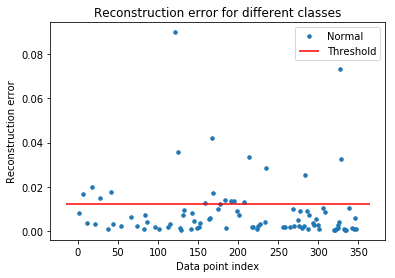

In [144]:
import matplotlib.pyplot as plt

threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
    
ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

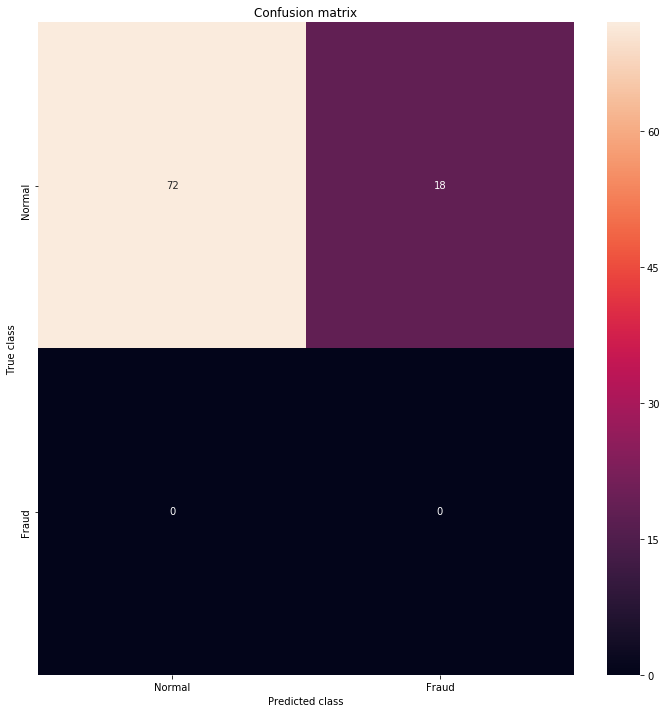

In [145]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# score = TCN.evaluate(x_test, x_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [146]:
counter = []

for f in range(0, len(error_df)):
    if error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter.append(1)
    else:
        counter.append(0)
        

In [147]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score( counter, y_test)
print("AUC: {:.2%}".format (auc))

AUC: 50.00%


In [148]:
### EVAL ON ANOMALIES
anom_class = anomalies['class']
anom = np.array(anomalies.drop('class', axis=1))


anom_predictions = TCN.predict(anom.reshape(anom.shape[0], anom.shape[1], 1))

anom_mse = np.mean(np.power(anom.reshape(anom.shape[0], anom.shape[1]) - anom_predictions, 2), axis=1)
anom_error_df = pd.DataFrame({'reconstruction_error': anom_mse,
                        'true_class': anom_class})

anom_error_df.describe()

,reconstruction_error,true_class
count,126.000000,126.0
mean,0.288656,1.0
std,0.232177,0.0
min,0.001704,1.0
25%,0.090093,1.0
50%,0.229545,1.0
75%,0.447668,1.0
max,0.996031,1.0


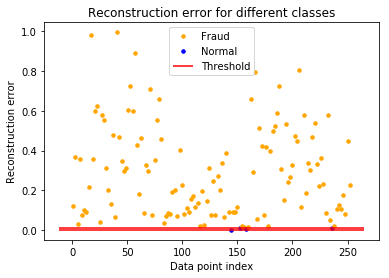

In [149]:
import matplotlib.pyplot as plt
# threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
# threshold = threshold.reconstruction_error
# threshold = threshold * 10
groups = anom_error_df.groupby('true_class')
fig, ax = plt.subplots()


for f in range(0, len(anom_error_df)):
    ax.plot(anom_error_df.index[f], anom_error_df.reconstruction_error.values[f], marker='o', ms=3.5, linestyle='',
           label="Fraud" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "Normal",
           color="orange" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "b")
    

    
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels)


plt.show();

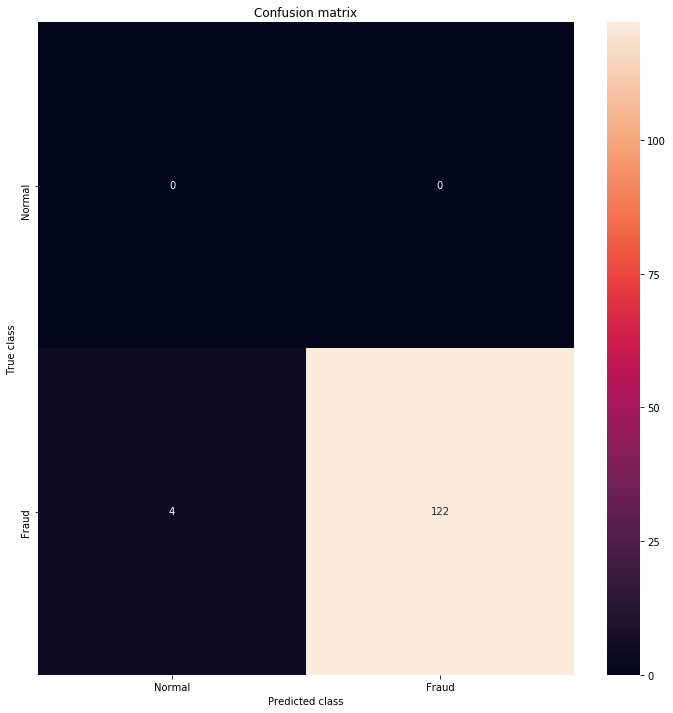

In [150]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in anom_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(anom_error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# score = TCN.evaluate(x_test, x_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [151]:
counter = 0

for f in range(0, len(anom_error_df)):
    if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter = counter + 1
    
    
print("Accuracy: {}".format(counter / len(anom_error_df)))

Accuracy: 0.9682539682539683


In [96]:
### TEST ON DF


points = np.array(df.drop('class', axis=1))
truths = df['class']


for f in range(0, len(truths.values)):
    if truths.values[f] == 'g':
        truths.values[f] = 0
    else:
        truths.values[f] = 1




preds = TCN.predict(points.reshape(points.shape[0], points.shape[1], 1))

pred_mse = np.mean(np.power(points - preds, 2), axis=1)
pred_error_df = pd.DataFrame({'reconstruction_error': pred_mse,
                        'true_class': truths})

pred_error_df.describe()

,reconstruction_error
count,351.000000
mean,0.074429
std,0.142398
min,0.000253
25%,0.000954
50%,0.002166
75%,0.071788
max,0.812352


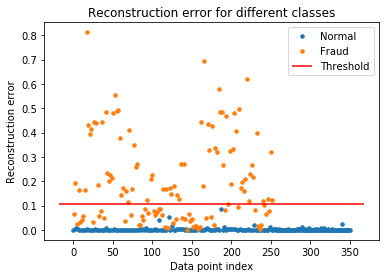

In [97]:
threshold = 1.5 * (pred_error_df.quantile(0.75) - pred_error_df.quantile(0.25))
groups = pred_error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [110]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in pred_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(pred_error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [111]:
counter = []

for f in range(0, len(pred_error_df)):
    if pred_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter.append(1)
    else:
        counter.append(0)

In [112]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score( counter, truths)
print("AUC: {:.2%}".format (auc))

AUC: 90.91%
